# Agreement between manual classifications and the deep neural network classifications
Notebook for creating figures 6 and 7 of the manuscript.

In [1]:
!pwd

/mnt/lustre02/work/mh0010/m300408/EUREC4A_CloudClassification/manual/EUREC4A_manualclassifications/notebooks


In [2]:
!which python

/sw/spack-rhel6/jupyterhub/jupyterhub/bin/python


In [3]:
domain = [10, 24, -61, -40]  # domain of original data [lat1, lat2, lon1, lon2]
lat0, lat1, lon0, lon1 = [10, 20, -58, -48]
label_map= {'Sugar':0, 'Fish': 3, 'Flowers': 2, 'Flower': 2, 'Gravel': 1, 'Unclassified': 4}
label_map_rv = {0:'Sugar', 1:'Gravel', 2: 'Flowers', 3: 'Fish', 4: 'Unclassified'}
color_dict = {'Sugar':'#A1D791','Fish':'#2281BB','Gravel':'#3EAE47', 'Flowers': '#93D2E2', 'Unclassified': 'lightgrey'}
frequency_threshold = 0.1

In [4]:
fn_ABI_IR = '/mnt/lustre02/work/mh0010/m300408/CharacterizationOfMesoscalePatterns/Data/Level_1/GOES16_CH13_classifications_2018-2020_NDJFM_30min.zarr/' #" ABIonICONdomain_DOM01.zarr'
files_manualClassifications_l3 = {
   "manualVIS": '../processed_data/EUREC4A_ManualClassifications_l3_VIS_instant.zarr',
   "manualIR": '../processed_data/EUREC4A_ManualClassifications_l3_IR_instant.zarr',
   "manualICON": '../processed_data/EUREC4A_ManualClassifications_l3_albedo_instant.zarr' 
}
fn_iorg = '/work/mh0010/m300408/EUREC4A_CloudClassification/metrics/GOES16_IR_nc_Iorg_EUREC4A_10-20_-58--48.nc'

In [5]:
%load_ext autoreload
%autoreload 2
import tqdm
import dask
import zarr
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import datetime as dt
import pandas as pd

import sys, os
sys.path.append("/home/mpim/m300408/CloudClassification/sugar-flower-fish-or-gravel")
from pyclouds.imports import *
from pyclouds.helpers import *
from pyclouds.zooniverse import *
from pyclouds.plot import *

del tqdm
import tqdm

sys.path.append(".")
import glob
from agreement_helpers import *

In [6]:
pd.__version__

'1.3.4'

## Calculate IoUs and compute classification mask

In [7]:
# run calculate_agreement.py first

## Load computed data and merge with existing computations of other workflows

In [8]:
# Read output created by calculate_agreement.py
agreement_files = []
for workflow, _ in files_manualClassifications_l3.items():
    file = f"../temporary_data/agreement_threshold{frequency_threshold}/agreement_results_ABI-IR_vs_{workflow}.pkl"
    if os.path.isfile(file):
        agreement_files.append(file)

        
print(agreement_files)
dataframes = [None]*len(agreement_files)
for f,file in enumerate(agreement_files):
    dataframes[f] = pd.read_pickle(file)

['../temporary_data/agreement_threshold0.1/agreement_results_ABI-IR_vs_manualVIS.pkl', '../temporary_data/agreement_threshold0.1/agreement_results_ABI-IR_vs_manualIR.pkl', '../temporary_data/agreement_threshold0.1/agreement_results_ABI-IR_vs_manualICON.pkl']


In [9]:
df_all = pd.concat(dataframes);
df_all.head()

,Sugar,Gravel,Flowers,Fish,Unclassified
2020-01-07 02:00:00,"{'area_fraction_ABI': 0.0, 'area_fraction_manu...","{'area_fraction_ABI': 0.82656, 'area_fraction_...","{'area_fraction_ABI': 0.0, 'area_fraction_manu...","{'area_fraction_ABI': 0.0, 'area_fraction_manu...","{'area_fraction_manualVIS': 1.0, 'area_fractio..."
2020-01-07 04:00:00,"{'area_fraction_ABI': 0.0, 'area_fraction_manu...","{'area_fraction_ABI': 0.9, 'area_fraction_manu...","{'area_fraction_ABI': 0.0, 'area_fraction_manu...","{'area_fraction_ABI': 0.0, 'area_fraction_manu...","{'area_fraction_manualVIS': 1.0, 'area_fractio..."
2020-01-07 06:00:00,"{'area_fraction_ABI': 0.0, 'area_fraction_manu...","{'area_fraction_ABI': 0.784131, 'area_fraction...","{'area_fraction_ABI': 0.0, 'area_fraction_manu...","{'area_fraction_ABI': 0.0, 'area_fraction_manu...","{'area_fraction_manualVIS': 1.0, 'area_fractio..."
2020-01-07 08:00:00,"{'area_fraction_ABI': 0.0, 'area_fraction_manu...","{'area_fraction_ABI': 0.800765, 'area_fraction...","{'area_fraction_ABI': 0.0, 'area_fraction_manu...","{'area_fraction_ABI': 0.0, 'area_fraction_manu...","{'area_fraction_manualVIS': 1.0, 'area_fractio..."
2020-01-07 10:00:00,"{'area_fraction_ABI': 0.0, 'area_fraction_manu...","{'area_fraction_ABI': 0.817747, 'area_fraction...","{'area_fraction_ABI': 0.0, 'area_fraction_manu...","{'area_fraction_ABI': 0.0, 'area_fraction_manu...","{'area_fraction_manualVIS': 1.0, 'area_fractio..."


In [10]:
# Restrict analysis by time period
mask = (df_all.index >= '2020-01-07') & (df_all.index <= '2020-02-22')
# IOP
#20 January and 20 February 2020
# mask = (df_all.index >= '2020-01-20') & (df_all.index <= '2020-02-20')

In [11]:
df_all = df_all.loc[mask]

In [12]:
Sugar_df = df_all.Sugar.apply(pd.Series)
Gravel_df = df_all.Gravel.apply(pd.Series)
Flowers_df = df_all.Flowers.apply(pd.Series)
Fish_df = df_all.Fish.apply(pd.Series)
Unclassified_df = df_all.Unclassified.apply(pd.Series)

In [13]:
for df,p in zip([Sugar_df, Gravel_df, Fish_df, Flowers_df, Unclassified_df], ['Sugar','Gravel','Fish','Flowers', 'Unclassified']):
    rename_dict = {}
    for c in df.columns:
        rename_dict[c]=p+"_"+c
    df.rename(columns=rename_dict, inplace=True)

In [14]:
from functools import reduce
df_all = reduce(lambda  left,right: pd.merge(left,right,left_index=True,right_index=True,
                                            how='outer'), [Sugar_df, Gravel_df, Flowers_df, Fish_df, Unclassified_df])

Note:
- nan values occur when the pattern has not been identified in any of the cases
- 0 occurs, if there has been no overlap between classes, which can also happen when one NN doesn't detect the pattern at all

## Area fractions

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

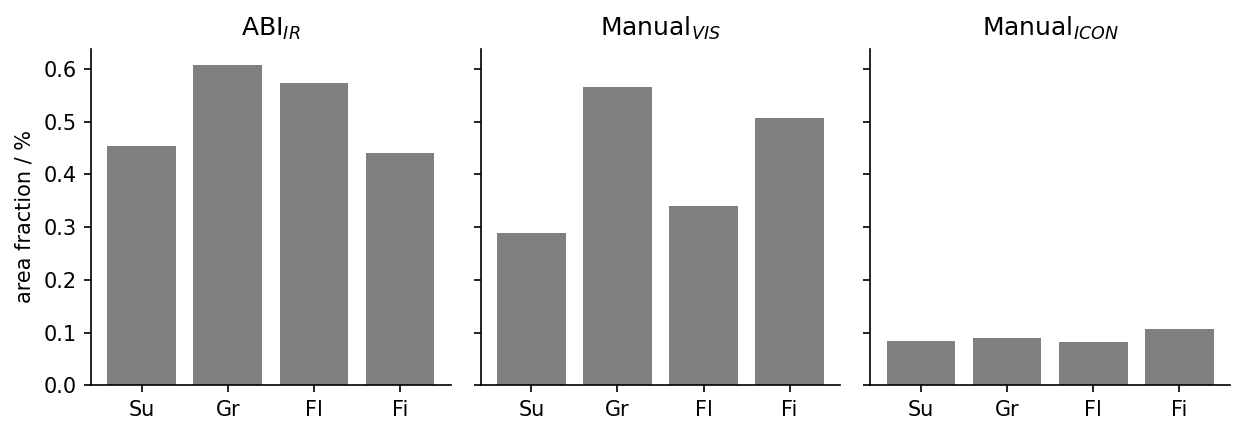

In [16]:
prop_dict = {
    "manualVIS":{
        'title': "Manual$_{VIS}$"
    },
    "manualIR":{
        'title': "Manual$_{IR}$"
    },
    "manualICON":{
        'title': "Manual$_{ICON}$"
    },
    "ABI":{
        'title': "ABI$_{IR}$"
    }
}
fig, axs = plt.subplots(1,3,figsize=(8.4,3),dpi=150,sharey=True)
for a,classification_approach in enumerate(["ABI", "manualVIS", "manualICON"]):
    means = {}
    for p, pattern in enumerate(['Sugar','Gravel','Flowers','Fish']):
        means[pattern]=df_all[pattern+'_area_fraction_'+classification_approach].loc[df_all[pattern+'_area_fraction_'+classification_approach] != 0].mean()
        axs[a].bar(p, means[pattern],color='grey')
    if a == 0:
        axs[a].set_ylabel('area fraction / %')
    axs[a].set_title(prop_dict[classification_approach]['title'])
    sns.despine()
    plt.tight_layout()
    axs[a].set_xticks([0,1,2,3])
    axs[a].set_xticklabels(['Su','Gr','Fl','Fi'])
# plt.savefig('areafraction_comparisons.pdf',bbox_inches="tight")

### Daily distribution

In [17]:
# df_daily_mean = df_all.resample('1D').mean()

In [18]:
df_daily_mean = df_all.iloc[np.logical_and((df_all.index.hour >= 12),(df_all.index.hour <= 20))].resample('1D').mean()

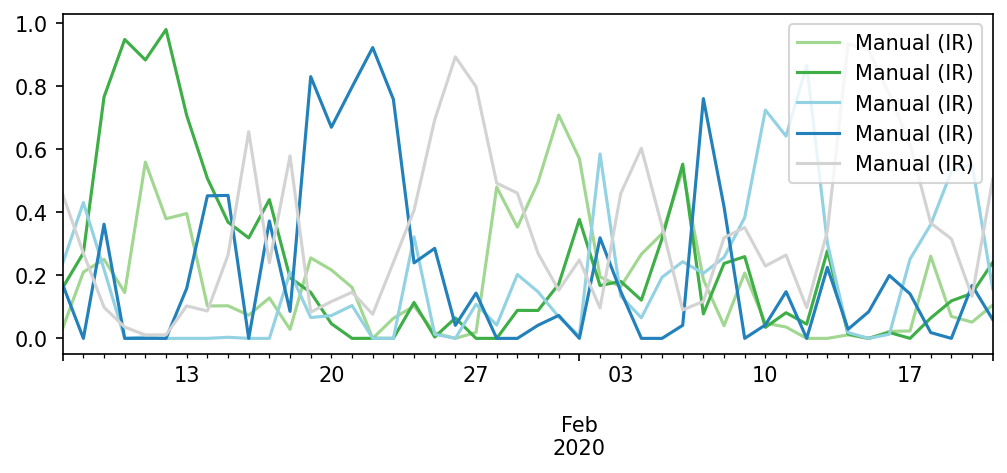

In [19]:
plt.figure(figsize=(8,3), dpi=150)
for pattern in ['Sugar', 'Gravel', 'Flowers', 'Fish', 'Unclassified']:
#     df_daily_mean[f'{pattern}_area_fraction_ABI'].plot(label='ABI', color=color_dict[pattern], linestyle='--')
    df_daily_mean[f'{pattern}_area_fraction_manualIR'].plot(label='Manual (IR)', color=color_dict[pattern], linestyle='-')
plt.legend()

In [20]:
df0 = df_all.filter(items=['Sugar_area_fraction_Manual','Gravel_area_fraction_Manual','Flowers_area_fraction_Manual','Fish_area_fraction_Manual','Unclassified_area_fraction_Manual']).rename(
    columns={'Sugar_area_fraction_Manual':'Sugar',
             'Gravel_area_fraction_Manual':'Gravel',
             'Flowers_area_fraction_Manual':'Flowers',
             'Fish_area_fraction_Manual':'Fish',
             'Unclassified_area_fraction_Manual':'Unclassified'
            })

In [21]:
df1 = df_daily_mean.filter(items=['Sugar_area_fraction_ABI','Gravel_area_fraction_ABI','Flowers_area_fraction_ABI',
                                  'Fish_area_fraction_ABI','Unclassified_area_fraction_ABI']).rename(
    columns={'Sugar_area_fraction_ABI':'Sugar',
             'Gravel_area_fraction_ABI':'Gravel',
             'Flowers_area_fraction_ABI':'Flowers',
             'Fish_area_fraction_ABI':'Fish',
             'Unclassified_area_fraction_ABI':'Unclassified'
            })

In [22]:
df2 = df_daily_mean.filter(items=['Sugar_area_fraction_manualIR','Gravel_area_fraction_manualIR',
                                  'Flowers_area_fraction_manualIR','Fish_area_fraction_manualIR',
                                  'Unclassified_area_fraction_manualIR'
                                 ]).rename(
    columns={'Sugar_area_fraction_manualIR':'Sugar',
             'Gravel_area_fraction_manualIR':'Gravel',
             'Flowers_area_fraction_manualIR':'Flowers',
             'Fish_area_fraction_manualIR':'Fish',
             'Unclassified_area_fraction_manualIR':'Unclassified'
            })

In [23]:
df3 = df_daily_mean.filter(items=['Sugar_area_fraction_manualVIS','Gravel_area_fraction_manualVIS',
                                  'Flowers_area_fraction_manualVIS','Fish_area_fraction_manualVIS',
                                  'Unclassified_area_fraction_manualVIS'
                                 ]).rename(
    columns={'Sugar_area_fraction_manualVIS':'Sugar',
             'Gravel_area_fraction_manualVIS':'Gravel',
             'Flowers_area_fraction_manualVIS':'Flowers',
             'Fish_area_fraction_manualVIS':'Fish',
             'Unclassified_area_fraction_manualVIS':'Unclassified'
            })

In [24]:
df4 = df_daily_mean.filter(items=['Sugar_area_fraction_manualICON','Gravel_area_fraction_manualICON',
                                  'Flowers_area_fraction_manualICON','Fish_area_fraction_manualICON',
                                  'Unclassified_area_fraction_manualICON'
                                 ]).rename(
    columns={'Sugar_area_fraction_manualICON':'Sugar',
             'Gravel_area_fraction_manualICON':'Gravel',
             'Flowers_area_fraction_manualICON':'Flowers',
             'Fish_area_fraction_manualICON':'Fish',
             'Unclassified_area_fraction_manualICON':'Unclassified'
            })

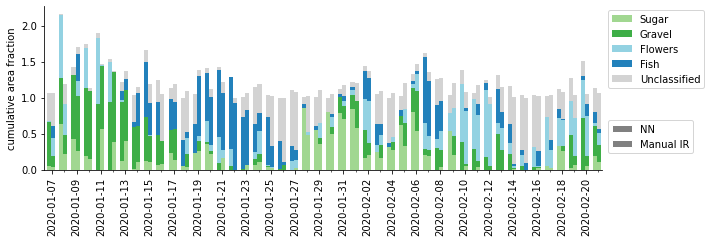

In [25]:
p=plot_clustered_stacked([df1, df2],["NN", "Manual IR"],title=None,figsize=(10,3),H=None, color_dict=color_dict)
p.set_ylabel('cumulative area fraction')
sns.despine()
# plt.savefig(f'../figures/cumulative_area_fraction_ABIvsManual_dailyindividual2h_{frequency_threshold}.pdf', bbox_inches='tight')

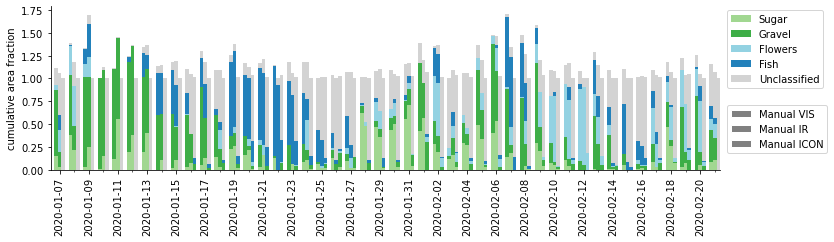

In [26]:
p=plot_clustered_stacked([df3, df2, df4],["Manual VIS", "Manual IR", "Manual ICON"],
                         title=None,figsize=(12,3),H=None, color_dict=color_dict)
p.set_ylabel('cumulative area fraction')
sns.despine()
plt.savefig(f'../figures/cumulative_area_fraction_ManualVISvsManualIRvsICON_dailyindividual2h_{frequency_threshold}_12-20UTC.pdf', bbox_inches='tight')

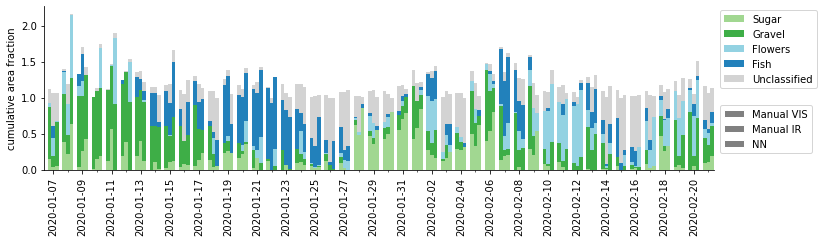

In [27]:
p=plot_clustered_stacked([df3, df2, df1],["Manual VIS", "Manual IR", "NN"],
                         title=None,figsize=(12,3),H=None, color_dict=color_dict)
p.set_ylabel('cumulative area fraction')
sns.despine()
plt.savefig(f'../figures/cumulative_area_fraction_ManualVISvsManualIRvsNN_dailyindividual2h_{frequency_threshold}.pdf', bbox_inches='tight')

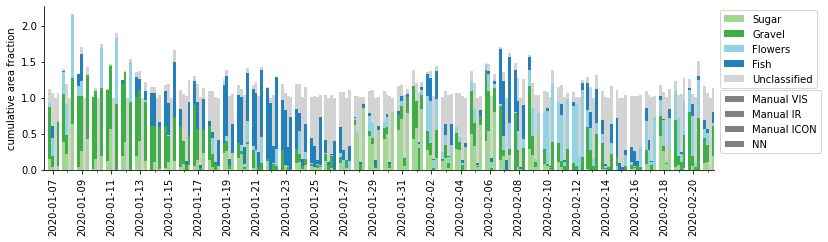

In [28]:
p=plot_clustered_stacked([df3, df2, df4, df1],["Manual VIS", "Manual IR", "Manual ICON", "NN"],
                         title=None,figsize=(12,3),H=None, color_dict=color_dict)
p.set_ylabel('cumulative area fraction')
sns.despine()
plt.savefig(f'../figures/cumulative_area_fraction_ManualVISvsManualIRvsNNvsICON_dailyindividual2h_{frequency_threshold}_12-20UTC.pdf', bbox_inches='tight')

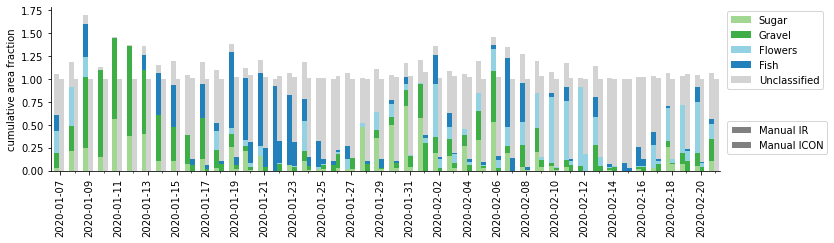

In [29]:
p=plot_clustered_stacked([df2, df4],["Manual IR", "Manual ICON"],
                         title=None,figsize=(12,3),H=None, color_dict=color_dict)
p.set_ylabel('cumulative area fraction')
sns.despine()
plt.savefig(f'../figures/cumulative_area_fraction_ManualIRvsManualICON_dailyindividual2h_{frequency_threshold}.pdf', bbox_inches='tight')

## Where do IoUs of 0 come from?

In [30]:
df_all

,Sugar_area_fraction_ABI,Sugar_area_fraction_manualVIS,Sugar_iou_ABI_manualVIS,Sugar_missing_ABI_manualVIS,Sugar_area_fraction_manualIR,Sugar_iou_ABI_manualIR,Sugar_missing_ABI_manualIR,Sugar_area_fraction_manualICON,Sugar_iou_ABI_manualICON,Sugar_missing_ABI_manualICON,...,Fish_area_fraction_manualIR,Fish_iou_ABI_manualIR,Fish_missing_ABI_manualIR,Fish_area_fraction_manualICON,Fish_iou_ABI_manualICON,Fish_missing_ABI_manualICON,Unclassified_area_fraction_manualVIS,Unclassified_area_fraction_ABI,Unclassified_area_fraction_manualIR,Unclassified_area_fraction_manualICON
2020-01-07 02:00:00,0.000000,0.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.173440,NaN,NaN
2020-01-07 02:00:00,0.000000,0.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.173440,0.585586,NaN
2020-01-07 02:00:00,0.000000,0.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.173440,NaN,1.0
2020-01-07 02:00:00,0.000000,0.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,3.0,NaN,NaN,NaN,1.000000,0.173440,NaN,NaN
2020-01-07 02:00:00,0.000000,0.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,3.0,NaN,NaN,NaN,NaN,0.173440,0.585586,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-22 00:00:00,0.548682,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2.0,...,0.342138,0.0,1.0,NaN,NaN,NaN,NaN,0.399424,0.349956,NaN
2020-02-22 00:00:00,0.548682,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2.0,...,0.342138,0.0,1.0,NaN,NaN,NaN,NaN,0.399424,NaN,1.0
2020-02-22 00:00:00,0.548682,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2.0,...,NaN,NaN,NaN,0.0,NaN,3.0,0.143659,0.399424,NaN,NaN
2020-02-22 00:00:00,0.548682,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2.0,...,NaN,NaN,NaN,0.0,NaN,3.0,NaN,0.399424,0.349956,NaN


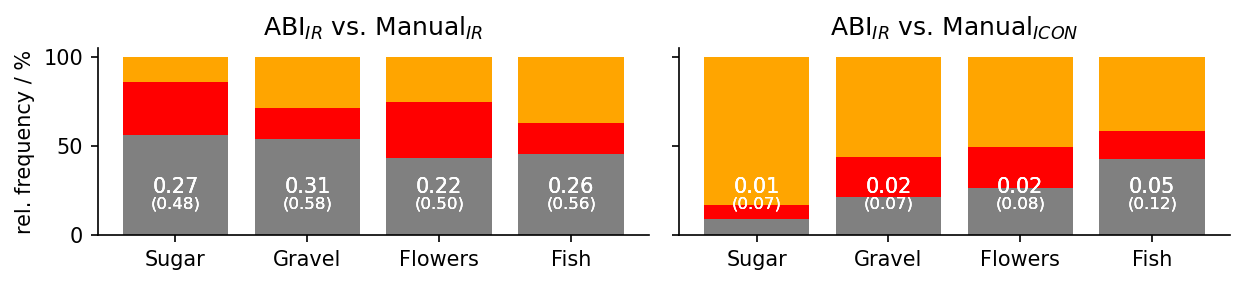

In [31]:
prop_dict = {
    "ABI_manualIR":{
        'colors': ['grey','red' , 'orange', 'green'],
        'title': 'ABI$_{IR}$ vs. Manual$_{IR}$'},
    "ABI_manualICON":{
        'colors': ['grey','red' , 'orange', 'green'],
        'title': 'ABI$_{IR}$ vs. Manual$_{ICON}$'},
    "MVIS_AIR":{
        'colors': ['grey', 'blue','orange', 'green'],
        'title': 'MODIS$_{VIS}$ vs. ABI$_{IR}$'},
    "MIR_AIR":{
        'colors':['grey', 'red' ,'orange', 'green'],
        'title': 'MODIS$_{IR}$ vs. ABI$_{IR}$'}
    
}

relative = True
fig,axs = plt.subplots(1,2,figsize=(8.4,2),dpi=150,sharey=True)
for cc, classification_comparison in enumerate(["ABI_manualIR", "ABI_manualICON"]):
    colors = prop_dict[classification_comparison]['colors']
    means = {}
    for p, pattern in enumerate(['Sugar','Gravel','Flowers','Fish']):
        total = np.count_nonzero(np.where(df_all[pattern+'_missing_'+classification_comparison].dropna() != 3,True,False))
        if total == 0:
            continue
        counts = np.zeros(4)
        iou_without_zeros = df_all[pattern+'_iou_'+classification_comparison].loc[df_all[pattern+'_missing_'+classification_comparison] ==0].mean()
        iou_with_zeros = df_all[pattern+'_iou_'+classification_comparison].mean()
        for i_,i in enumerate([0,1,2,3]): #0: missing in none; 3: missing in both; 2:missing in the second (AIR)
            c=np.count_nonzero(np.where(df_all[pattern+'_missing_'+classification_comparison].dropna() == i,True,False))
            if relative:
                c = c/total*100
            counts[i_] = c
            if i == 3:
                continue
            if i_ == 0:
                axs[cc].bar(p, c, color=colors[i], label='no classifications')
            else:
                axs[cc].bar(p, c, bottom=np.sum(counts[0:i_]), color=colors[i])
            axs[cc].text(p,24, "{:3.2f}".format(iou_with_zeros),ha='center',color='white')
            axs[cc].text(p,15, "({:3.2f})".format(iou_without_zeros),ha='center',color='white',fontsize=8)
            axs[cc].set_title(prop_dict[classification_comparison]['title'])
    axs[cc].set_xticks([0,1,2,3])
    axs[cc].set_xticklabels(['Sugar','Gravel','Flowers','Fish'])
    if cc == 0:
        axs[cc].set_ylabel('rel. frequency / %')
    sns.despine()
    plt.tight_layout()
# plt.savefig(f'IOU_comparisons_mean_DOM0{DOM}.pdf',bbox_inches="tight")

## Comparison with Iorg

In [32]:
ds_iorg = xr.open_dataset(fn_iorg)

In [33]:
contaminated_dates = np.unique(ds_iorg.where(ds_iorg.percentile_Tb < 285, drop=True).time.dt.date)

In [34]:
ds_iorg_sel = ds_iorg.sel(time=~np.in1d(ds_iorg.time.dt.date,contaminated_dates), drop=True)
ds_iorg_sel = ds_iorg_sel.sel(time=np.in1d(ds_iorg_sel.time.dt.date,np.unique(df_all.index.date)))

In [35]:
ds_iorg_mean = ds_iorg_sel.groupby(ds_iorg_sel.time.dt.date).mean()
# ds_iorg_mean = ds_iorg.groupby(ds_iorg.time.dt.date).mean()

In [36]:
ds_iorg_mean

<xarray.Dataset>
Dimensions:            (date: 35)
Coordinates:
  * date               (date) object 2020-01-07 2020-01-08 ... 2020-02-22
Data variables:
    Iorg               (date) float64 0.5749 0.5685 0.5702 ... 0.5721 0.5808
    cluster_size_mean  (date) float64 0.000222 0.0001274 ... 0.0003351 0.000234
    cluster_size_std   (date) float64 0.001743 0.0008646 ... 0.00269 0.003198
    N                  (date) float64 743.6 919.5 939.9 ... 771.1 854.5
    cloud_fraction     (date) float64 0.1538 0.1179 0.1447 ... 0.2424 0.1979
    percentile_Tb      (date) float64 291.7 293.0 292.1 ... 291.7 289.2 290.4

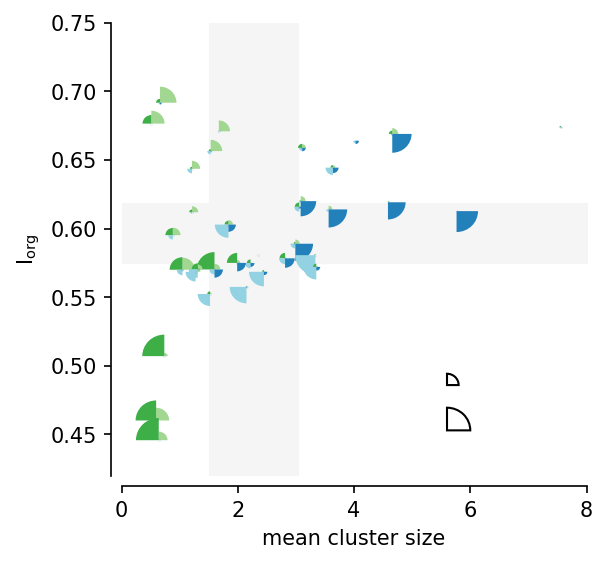

In [37]:
fig, ax = plt.subplots(figsize=(4,4),dpi=150)

patches = []

cluster_size_mean = (ds_iorg_mean.cluster_size_mean.values)*10**4
iorg = ds_iorg_mean.Iorg.values

# ax.plot(ds_iorg_mean.cluster_size_mean*500, ds_iorg_mean.Iorg,'.', markersize=0.1)
ax.plot(cluster_size_mean, iorg,'.', markersize=0.1)
# ax.set_aspect(1)
ax.set_xlim(0,8)
ax.set_ylim(0.42,0.75)
trans_before_plotting = ax.transAxes.inverted().transform(ax.transData.transform((2.219574468085107,0.5748936170212766)))

for t, (x,y) in enumerate(zip(cluster_size_mean, iorg)):
#     if t>15:continue
    date = ds_iorg_mean.isel(date=t).date.values
    date = dt.datetime.combine(date.item(), dt.datetime.min.time())
    
#     plt.annotate(date.strftime('%Y/%m/%d'),(x,y),xytext=(x+0.5,y+0.02),arrowprops=dict(arrowstyle='-'))
    
    try:
        data = df2.loc[date]
    except KeyError:
        continue
    # Convert data coords to axes coords (this is necessary to draw a circular pie chart)
    x_axes, y_axes = ax.transAxes.inverted().transform(ax.transData.transform((x,y)))
# Some limiting conditions on Wedge
    for p_,pattern in enumerate(['Sugar','Gravel', 'Flowers','Fish']):
        w = Wedge((x_axes, y_axes), data[pattern]/80*4, p_*90, (p_+1)*90, fc=color_dict[pattern], transform=ax.transAxes)
        ax.add_patch(w)

w = Wedge((.7, .10), 1/80*4, 0, 90, fc='white',ec='k', transform=ax.transAxes)
ax.add_patch(w)
w = Wedge((.7, .20), 0.5/80*4, 0, 90, fc='white',ec='k', transform=ax.transAxes)
ax.add_patch(w)

# plt.axvline(np.nanpercentile(cluster_size_mean,1/3*100), 0,1, linewidth=0.6, color='grey')
# plt.axvline(np.nanpercentile(cluster_size_mean,2/3*100), 0,1, linewidth=0.6, color='grey')
# plt.axhline(np.nanpercentile(iorg,1/3*100), 0,1, linewidth=0.6, color='grey')
# plt.axhline(np.nanpercentile(iorg,2/3*100), 0,1, linewidth=0.6, color='grey')

plt.fill_betweenx([0,1], np.nanpercentile(cluster_size_mean,1/3*100), np.nanpercentile(cluster_size_mean,2/3*100), color='whitesmoke')
plt.fill_between([0,8], np.nanpercentile(iorg,1/3*100), np.nanpercentile(iorg,2/3*100), color='whitesmoke')




# p = PatchCollection(patches, alpha=1)
# ax.add_collection(p)
plt.xlabel('mean cluster size')
plt.ylabel('I$_\mathrm{org}$')
sns.despine(offset=5)
trans_after_plotting = ax.transAxes.inverted().transform(ax.transData.transform((2.219574468085107,0.5748936170212766)))
assert np.all(trans_after_plotting == trans_before_plotting), print("Transformation has changed, data is likely not plotted correctly!")
plt.savefig(f'../figures/Iorg_vs_S_hueManualClassifications_{frequency_threshold}_annot.pdf', bbox_inches="tight")

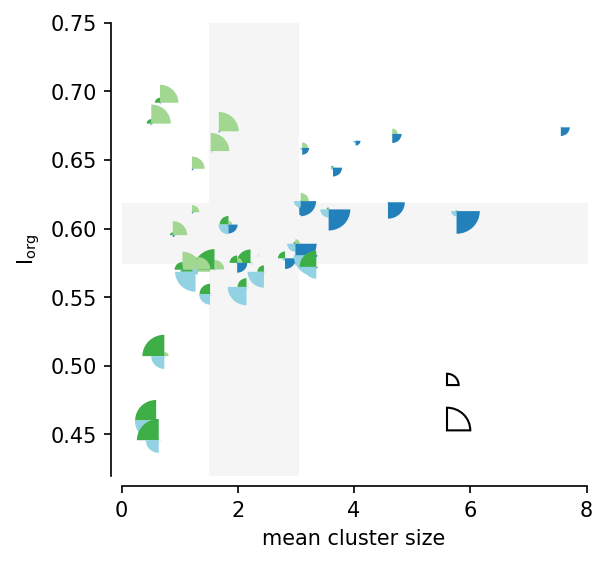

In [38]:
fig, ax = plt.subplots(figsize=(4,4),dpi=150)

patches = []

cluster_size_mean = (ds_iorg_mean.cluster_size_mean.values)*10**4
iorg = ds_iorg_mean.Iorg.values

# ax.plot(ds_iorg_mean.cluster_size_mean*500, ds_iorg_mean.Iorg,'.', markersize=0.1)
ax.plot(cluster_size_mean, iorg,'.', markersize=0.1)
# ax.set_aspect(1)
ax.set_xlim(0,8)
ax.set_ylim(0.42,0.75)
trans_before_plotting = ax.transAxes.inverted().transform(ax.transData.transform((2.219574468085107,0.5748936170212766)))

for t, (x,y) in enumerate(zip(cluster_size_mean, iorg)):
#     if t>15:continue
    date = ds_iorg_mean.isel(date=t).date.values
    date = dt.datetime.combine(date.item(), dt.datetime.min.time())
    try:
        data = df1.loc[date]
    except KeyError:
        continue
    # Convert data coords to axes coords
    x_axes, y_axes = ax.transAxes.inverted().transform(ax.transData.transform((x,y)))
# Some limiting conditions on Wedge
    for p_,pattern in enumerate(['Sugar','Gravel', 'Flowers','Fish']):
        w = Wedge((x_axes, y_axes), data[pattern]/80*4, p_*90, (p_+1)*90, fc=color_dict[pattern], transform=ax.transAxes)
        ax.add_patch(w)

w = Wedge((.7, .10), 1/80*4, 0, 90, fc='white',ec='k', transform=ax.transAxes)
ax.add_patch(w)
w = Wedge((.7, .20), 0.5/80*4, 0, 90, fc='white',ec='k', transform=ax.transAxes)
ax.add_patch(w)

# plt.axvline(np.nanpercentile(cluster_size_mean,1/3*100), 0,1, linewidth=0.6, color='grey')
# plt.axvline(np.nanpercentile(cluster_size_mean,2/3*100), 0,1, linewidth=0.6, color='grey')
# plt.axhline(np.nanpercentile(iorg,1/3*100), 0,1, linewidth=0.6, color='grey')
# plt.axhline(np.nanpercentile(iorg,2/3*100), 0,1, linewidth=0.6, color='grey')

plt.fill_betweenx([0,1], np.nanpercentile(cluster_size_mean,1/3*100), np.nanpercentile(cluster_size_mean,2/3*100), color='whitesmoke')
plt.fill_between([0,8], np.nanpercentile(iorg,1/3*100), np.nanpercentile(iorg,2/3*100), color='whitesmoke')




# p = PatchCollection(patches, alpha=1)
# ax.add_collection(p)
plt.xlabel('mean cluster size')
plt.ylabel('I$_\mathrm{org}$')
sns.despine(offset=5)
trans_after_plotting = ax.transAxes.inverted().transform(ax.transData.transform((2.219574468085107,0.5748936170212766)))
assert np.all(trans_after_plotting == trans_before_plotting), print("Transformation has changed, data is likely not plotted correctly!")
plt.savefig(f'../figures/Iorg_vs_S_hueNN_{frequency_threshold}.pdf', bbox_inches="tight")